In [1]:
!pip install transformers[torch] -q
!pip install numpy matplotlib -q

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import torch
import pandas as pd
import numpy as np
import os
from transformers import AutoTokenizer,AutoModelForMaskedLM
from transformers import pipeline
import re

In [4]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [5]:
model1=AutoModelForMaskedLM.from_pretrained('sampathlonka/San-ALBERT') 
model1

AlbertForMaskedLM(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(32001, 128, padding_idx=0)
      (position_embeddings): Embedding(514, 128)
      (token_type_embeddings): Embedding(1, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)


In [6]:
model1.albert

AlbertModel(
  (embeddings): AlbertEmbeddings(
    (word_embeddings): Embedding(32001, 128, padding_idx=0)
    (position_embeddings): Embedding(514, 128)
    (token_type_embeddings): Embedding(1, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): AlbertTransformer(
    (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
    (albert_layer_groups): ModuleList(
      (0): AlbertLayerGroup(
        (albert_layers): ModuleList(
          (0): AlbertLayer(
            (full_layer_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (attention): AlbertAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (attention_dropout): Dropout(p=0.1, inplace=False)
  

In [7]:
tokenizer1=AutoTokenizer.from_pretrained('sampathlonka/San-ALBERT')
tokenizer1

AlbertTokenizerFast(name_or_path='sampathlonka/San-ALBERT', vocab_size=32000, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '<unk>', 'sep_token': '[SEP]', 'pad_token': '<pad>', 'cls_token': '[CLS]', 'mask_token': AddedToken("[MASK]", rstrip=False, lstrip=True, single_word=False, normalized=False)}, clean_up_tokenization_spaces=True)

In [8]:
folder_names = []
texts=[]

In [9]:
folder_path = '/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam'

# List all files in the folder
for folder_name in os.listdir(folder_path):
    folder_dir = os.path.join(folder_path, folder_name)
    print(folder_dir)
    df = pd.read_excel(folder_dir)
    # Iterate through each row and store it as a list
    for index, row in df.iterrows():
        t = row.tolist()
        texts.append(t)
        folder_names.append(folder_name[:-5])
df = pd.DataFrame({'Text': texts, 'FolderName': folder_names})

/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_16.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_13.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_03.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_01.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_02.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_08.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_17.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_15.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_18.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_04.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_14.xlsx
/kaggle/input/mahakavyas/kiratarjuniyam/kiratarjuniyam/Kiratarjuniyam_sarga_

In [10]:
len(texts)
df.Text[580]
df.FolderName[580]

'Kiratarjuniyam_sarga_14'

In [11]:
# Define custom functions to process text within a list
def process_text(text_list):
    processed_text_list = []
    for text in text_list:
        # Remove newline characters '\n' and tab characters '\t'
        cleaned_text = text.replace('\n', '').replace('\t', '')
        cleaned_text = re.sub('[॥.*?॥]|[॥]', '', cleaned_text) # replaces ॥ text ॥ or॥ by a ।
        cleaned_text = re.sub('।','',cleaned_text)
        cleaned_text = re.sub('१','',cleaned_text)
        cleaned_text = re.sub('६','',cleaned_text)
        cleaned_text = re.sub('२','',cleaned_text)
        cleaned_text = re.sub('३', '',cleaned_text)
        cleaned_text = re.sub('४', '',cleaned_text)
        cleaned_text = re.sub('o','',cleaned_text)
        cleaned_text = re.sub('५', '',cleaned_text)
        cleaned_text = re.sub('९', '',cleaned_text)
        cleaned_text = re.sub('७', '',cleaned_text)
        cleaned_text = re.sub('०', '',cleaned_text)
        cleaned_text = re.sub('८', '',cleaned_text)
        '''cleaned_text = re.sub('\xa0','',cleaned_text)
        cleaned_text = re.sub('.','',cleaned_text)
        cleaned_text = re.sub('0','',cleaned_text)
        cleaned_text = re.sub('[(]','',cleaned_text)
        cleaned_text = re.sub('[)]','',cleaned_text)'''
        # Split by '||' and keep only the part before it
        cleaned_text = cleaned_text.split('||')[0].strip()
        processed_text_list.append(cleaned_text)
    return processed_text_list

# Apply the custom function to each row of the 'Text' column
df['Text'] = df['Text'].apply(process_text)

# Display the modified DataFrame
print(df)

                                                   Text  \
0     [मदस्रुतिश्यामितगण्डलेखाः क्रामन्ति विक्रान्तन...   
1     [विचित्रया चित्रयतेव भिन्नां रुचं रवेः केतनरत्...   
2     [समुल्लसत्प्रास-महोर्मिमालं परिस्फुरच्चामर-फेन...   
3     [हताहतेत्युद्धतभीमघोषैः समुज्झिता योद्धृभिरभ्य...   
4     [अभ्यायतः सन्ततधूमधूम्रं व्यापि प्रभाजालमिवान्...   
...                                                 ...   
1025  [असकलनयनेक्षितानि लज्जा गतमलसं परिपाण्डुता विष...   
1026  [अलसपदमनोरमं प्रकृत्या जितकलहंसवधूगति प्रयातम्...   
1027  [भृशकुसुमशरेषु-पातमोहा- दनवसितार्थ-पदाकुलोऽभिल...   
1028  [रुचिकरमपि नार्थवद्बभूव स्तिमितसमाधिशुचौ पृथात...   
1029  [स्वयं संराध्यैवं शतमखमखण्डेन तपसा परोच्छित्त्...   

                   FolderName  
0     Kiratarjuniyam_sarga_16  
1     Kiratarjuniyam_sarga_16  
2     Kiratarjuniyam_sarga_16  
3     Kiratarjuniyam_sarga_16  
4     Kiratarjuniyam_sarga_16  
...                       ...  
1025  Kiratarjuniyam_sarga_10  
1026  Kiratarjuniyam_sarga_10  
102

In [12]:
df

,Text,FolderName
0,[मदस्रुतिश्यामितगण्डलेखाः क्रामन्ति विक्रान्तन...,Kiratarjuniyam_sarga_16
1,[विचित्रया चित्रयतेव भिन्नां रुचं रवेः केतनरत्...,Kiratarjuniyam_sarga_16
2,[समुल्लसत्प्रास-महोर्मिमालं परिस्फुरच्चामर-फेन...,Kiratarjuniyam_sarga_16
3,[हताहतेत्युद्धतभीमघोषैः समुज्झिता योद्धृभिरभ्य...,Kiratarjuniyam_sarga_16
4,[अभ्यायतः सन्ततधूमधूम्रं व्यापि प्रभाजालमिवान्...,Kiratarjuniyam_sarga_16
...,...,...
1025,[असकलनयनेक्षितानि लज्जा गतमलसं परिपाण्डुता विष...,Kiratarjuniyam_sarga_10
1026,[अलसपदमनोरमं प्रकृत्या जितकलहंसवधूगति प्रयातम्...,Kiratarjuniyam_sarga_10
1027,[भृशकुसुमशरेषु-पातमोहा- दनवसितार्थ-पदाकुलोऽभिल...,Kiratarjuniyam_sarga_10
1028,[रुचिकरमपि नार्थवद्बभूव स्तिमितसमाधिशुचौ पृथात...,Kiratarjuniyam_sarga_10


In [13]:
for i in range(len(df)):
    print(df.Text[i])

['मदस्रुतिश्यामितगण्डलेखाः क्रामन्ति विक्रान्तनराधिरूढाः  सहिष्णवो नेह युधामभिज्ञा नागा नगोच्छ्रायमिवाक्षिपन्तः']
['विचित्रया चित्रयतेव भिन्नां रुचं रवेः केतनरत्नभासा  महारथौघेन न सन्निरुद्धाः पयोदमन्द्रध्वनिना धरित्री']
['समुल्लसत्प्रास-महोर्मिमालं परिस्फुरच्चामर-फेनपङ्क्ति  विभिन्नमर्यादमिहातनोति नाश्वीयमाशा जलधेरिवाम्भः']
['हताहतेत्युद्धतभीमघोषैः समुज्झिता योद्धृभिरभ्यमित्रम्  न हेतयः प्राप्ततडित्त्विषः खे विवस्वदंशुज्वलिताः पतन्ति']
['अभ्यायतः सन्ततधूमधूम्रं व्यापि प्रभाजालमिवान्तकस्य  रजः प्रतूर्णाश्व-रथाङ्गनुन्नं तनोति न व्योमनि मातरिश्वा']
['भूरेणुना रासभधूसरेण तिरोहिते वर्त्मनि लोचनानाम्  नास्त्यत्र तेजस्विभिरुत्सुकाना- मह्नि प्रदोषः सुरसुन्दरीणाम्']
['रथाङ्गसङ्क्रीडितमश्वहेषा बृहन्ति मत्तद्विपबृंहितानि  सङ्घर्षयोगादिव मूर्च्छितानि ह्रादं निगृह्णन्ति न दुन्दुभीनाम्']
['अस्मिन् यशःपौरुषलोलुपाना- मरातिभिः प्रत्युरसं क्षतानाम्  मूर्छान्तरायं मुहुरुच्छिनत्ति नासारशीतं करिशीकराम्भः']
['असृङ्नदीनामुपचीयमानै- र्विदारयद्भिः पदवीं ध्वजिन्याः  उच्छ्रायमायान्ति न शोणितौघैः पङ्कैरिवाश्यानघ

In [14]:
embedding=[]

In [15]:
for i in range(len(df)):
    with torch.no_grad():
        t = tokenizer1.encode(df.Text[i][0],max_length=512, padding=True, truncation=True, return_tensors="pt")
        model_output = model1.albert(t).last_hidden_state
        model_output = model_output.squeeze()
        out = torch.mean(model_output,dim=0)
        out_numpy = out.numpy()
        embedding.append(out_numpy)

In [16]:
embedding[500].shape

(768,)

In [17]:
data= np.array(embedding)
data

array([[ 0.2560084 , -0.88274014, -0.00503492, ...,  1.4362524 ,
         0.6730974 , -0.4716495 ],
       [ 0.2560084 , -0.88274014, -0.00503492, ...,  1.4362524 ,
         0.6730974 , -0.47164953],
       [ 0.2560084 , -0.8827401 , -0.00503492, ...,  1.4362525 ,
         0.6730974 , -0.47164953],
       ...,
       [ 0.2560084 , -0.88274014, -0.00503492, ...,  1.4362524 ,
         0.6730973 , -0.4716495 ],
       [ 0.2560084 , -0.8827401 , -0.00503492, ...,  1.4362522 ,
         0.6730973 , -0.4716495 ],
       [ 0.2560084 , -0.8827401 , -0.00503492, ...,  1.4362524 ,
         0.6730974 , -0.47164953]], dtype=float32)

In [18]:
data.shape

(1030, 768)

# t-SNE Visualization

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [20]:
# Create a t-SNE object
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)

# Apply t-SNE to the scaled data
tsne_result = tsne.fit_transform(data)

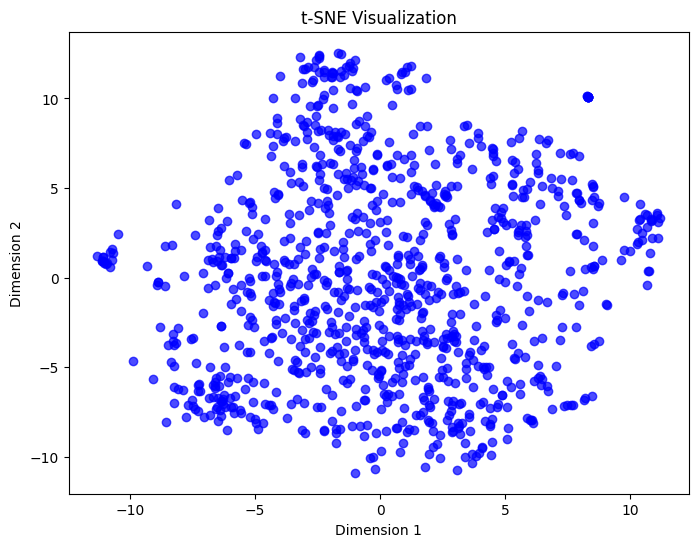

In [21]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', c='b', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

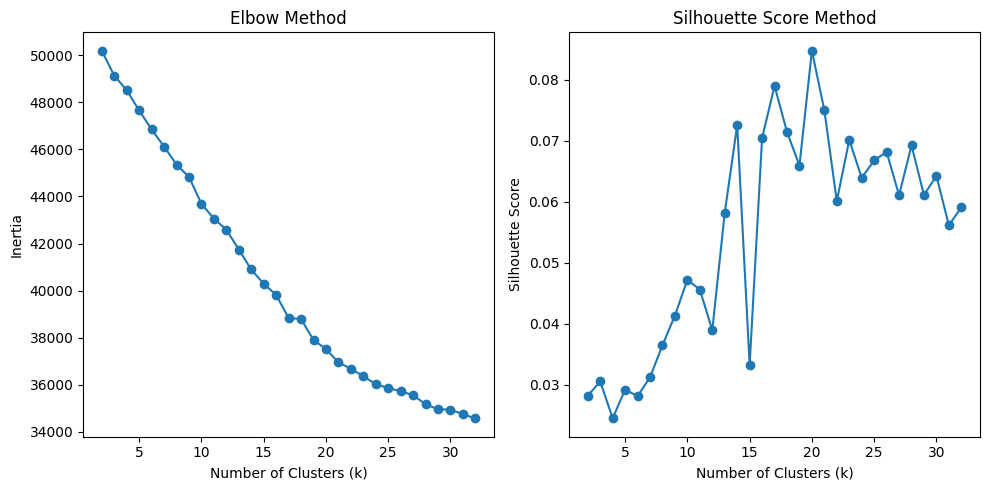

Silhouette Score for 3 clusters: 0.030526218935847282


In [22]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Generate random data for demonstration (replace with your data)
np.random.seed(0)
#data = np.random.rand(95, 768)

# Step 1: Dimensionality Reduction (PCA)
n_components = 50  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data)

# Step 2: Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Step 3: Choosing the Number of Clusters (k)
k_values = range(2, 33)
inertia_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the Elbow Method to choose k
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()

# Based on the plots, choose an appropriate value of k

# Step 4: K-means clustering with chosen k
chosen_k = 3  # Replace with your chosen k
kmeans = KMeans(n_clusters=chosen_k, random_state=0)
kmeans.fit(data_scaled)

# Step 5: Evaluate the Results (Silhouette Score)
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score for {chosen_k} clusters: {silhouette_avg}")